# 1. Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Set Directory and Call Dataset

In [2]:
# 1. Function to declare path
def declare_path() : 
    main_dir = f"D:\\Freelance Data Scientist"
    data_dir = os.path.join(main_dir,f'202410\\01_Analisis TryOut UTBK')

    return main_dir, data_dir

# 2. Funtion to call dataset
def call_dataset(data_dir, file_name) :
    
    if file_name.endswith("xlsx") :
        df = pd.read_excel(os.path.join(data_dir,file_name))
    elif file_name.endswith(".csv") :
        df = pd.read_csv(os.path.join(data_dir,file_name))
    else :
        print("Unsupported Format!")

    return df

# 3. Running the syntax
main_dir, data_dir = declare_path()
df_tryout = call_dataset(data_dir=data_dir, file_name="dataset_cleaned.xlsx")

# Display our dataset
display(df_tryout)

,Unnamed: 0,user_id,full_name,email,title,tps,Penalaran Kuantitatif,Literasi Bahasa Indonesia,Literasi Bahasa Inggris,Penalaran Matematika,Pemahaman Bacaan & Menulis,Pengetahuan & Pemahaman Umum,Pengetahuan Kuantitatif,Penalaran Induktif,Penalaran Deduktif,Rata - rata,Outliers,Elliptic Score
0,1,541120,Aisyah,murid149@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,600,566,350,500,850,450,666,500,900,598.000000,1,17.042140
1,4,541128,Dico Ferdiyanto,murid153@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,800,433,299,433,566,649,600,566,500,538.444444,1,28.776840
2,5,541172,Ihsan Aditya Putra,murid175@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,800,511,447,133,466,749,400,666,533,522.777778,1,29.005866
3,6,541152,Rakae Eka Daneswari,murid165@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,300,333,600,333,466,299,600,433,500,429.333333,1,35.317682
4,7,541126,Celvin Rasya Pamungkas,murid152@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,400,433,299,433,416,449,666,866,500,495.777778,1,17.564715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,218,541000,Ukasyah Ali Al Hibrizi,murid89@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,0,222,116,166,0,0,0,0,0,56.000000,1,60.917980
196,219,540904,Galuh Reswara,murid41@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,200,0,0,0,0,0,0,233,66,55.444444,1,51.737209
197,220,540960,Elsa Aprilia Putri,murid69@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,0,244,83,150,0,0,0,0,0,53.000000,1,59.793920
198,221,629257,Mahesa danu wijaya,murid230@smasmuhammadiyah2surakarta.kp.id,TRY OUT 1 PTN,YES,200,0,0,0,0,0,0,100,66,40.666667,1,54.303215


# 3. Normality Tests

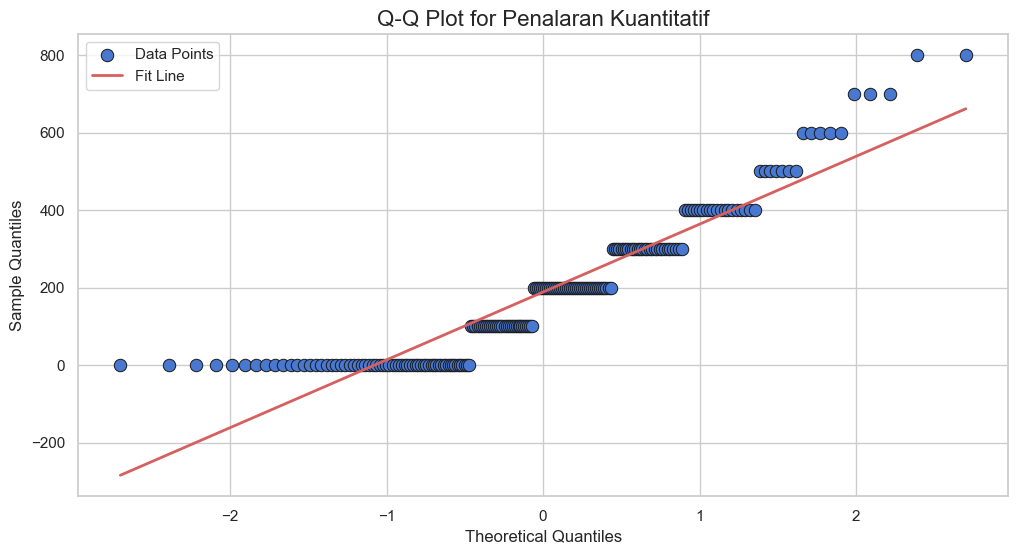

Shapiro-Wilk Normality Test: statistic=0.875, p_value=0.000000
Penalaran Kuantitatif is not normally distributed




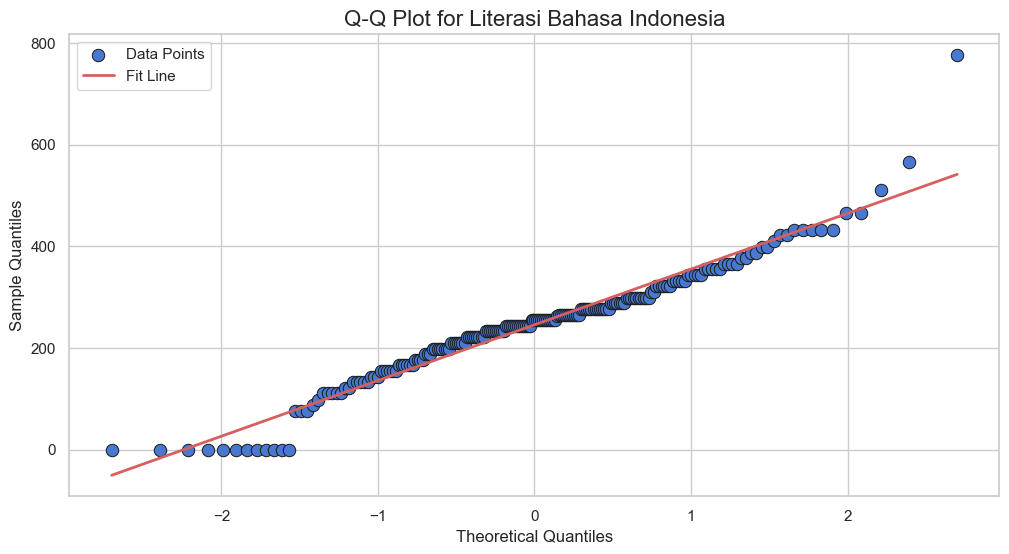

Shapiro-Wilk Normality Test: statistic=0.955, p_value=0.000006
Literasi Bahasa Indonesia is not normally distributed




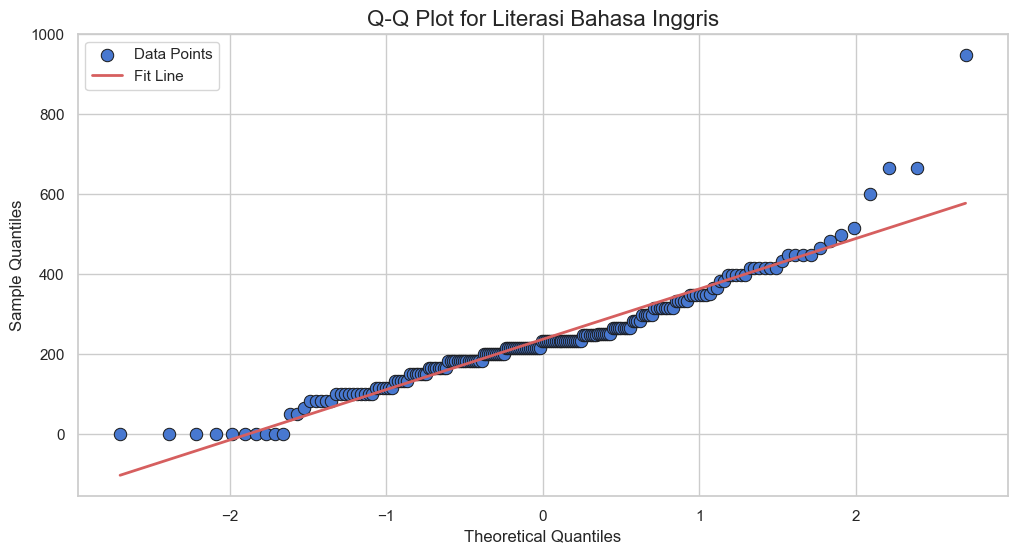

Shapiro-Wilk Normality Test: statistic=0.925, p_value=0.000000
Literasi Bahasa Inggris is not normally distributed




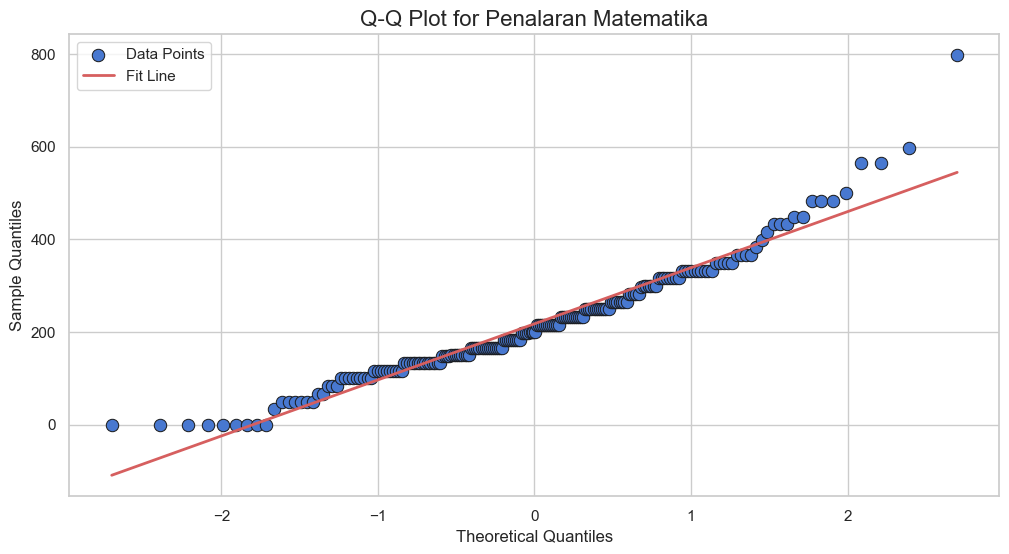

Shapiro-Wilk Normality Test: statistic=0.950, p_value=0.000002
Penalaran Matematika is not normally distributed




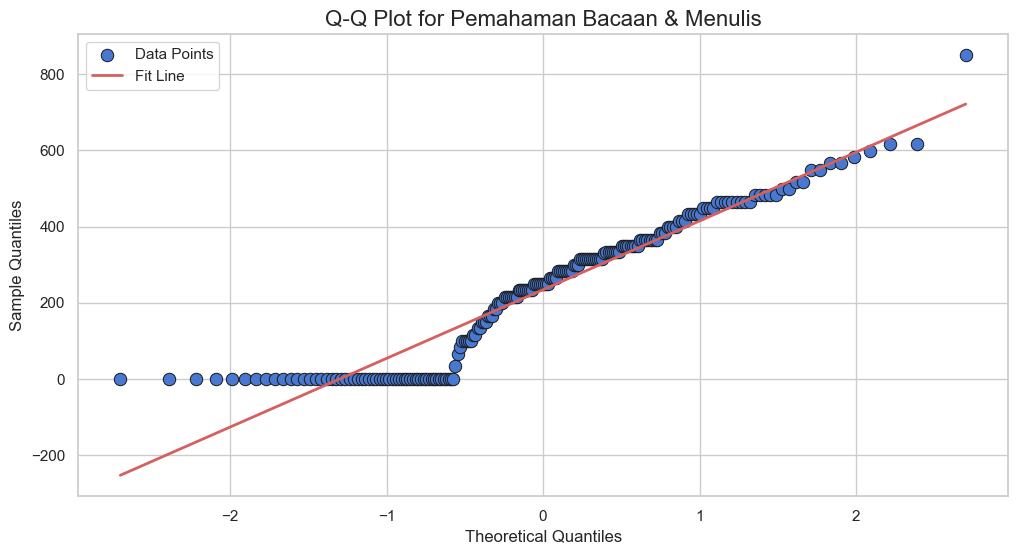

Shapiro-Wilk Normality Test: statistic=0.915, p_value=0.000000
Pemahaman Bacaan & Menulis is not normally distributed




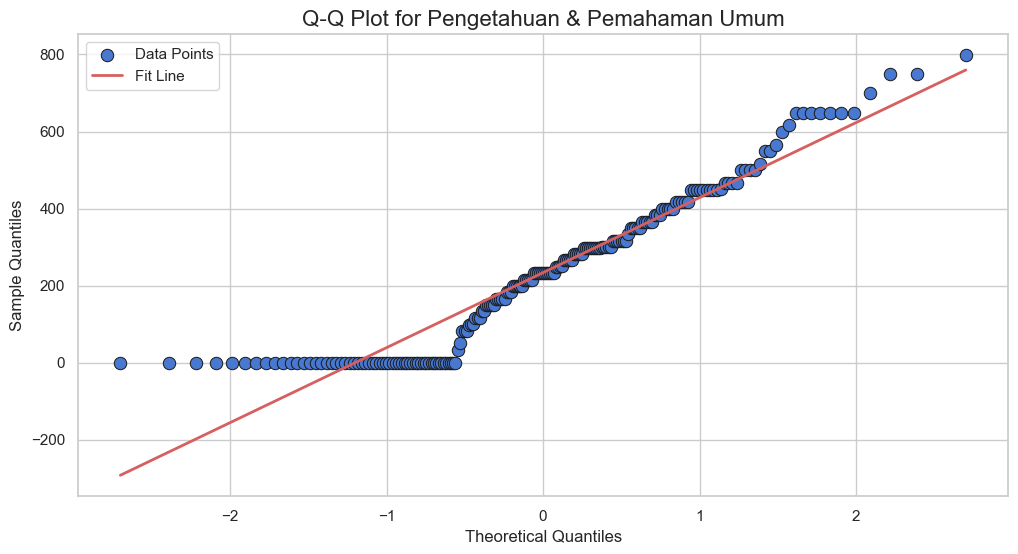

Shapiro-Wilk Normality Test: statistic=0.915, p_value=0.000000
Pengetahuan & Pemahaman Umum is not normally distributed




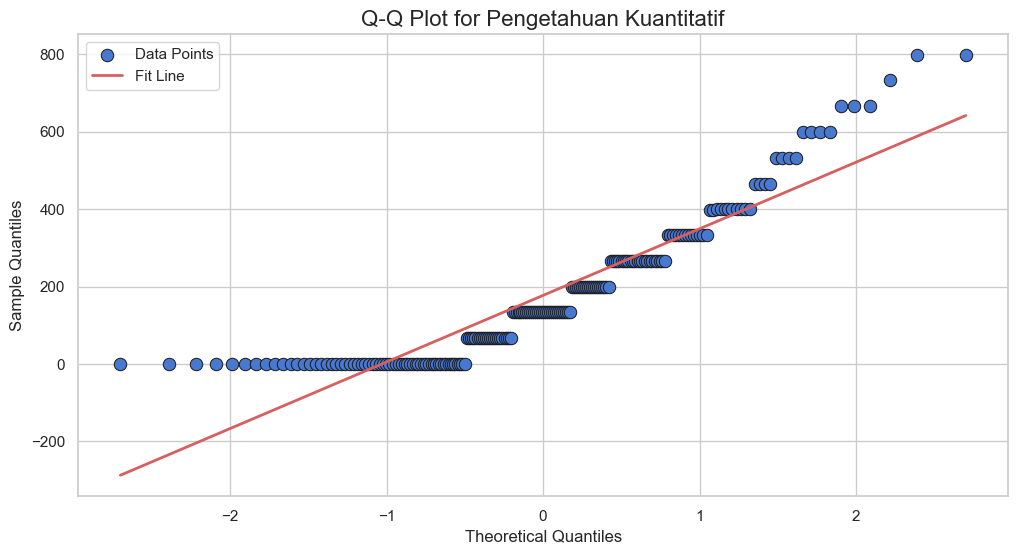

Shapiro-Wilk Normality Test: statistic=0.862, p_value=0.000000
Pengetahuan Kuantitatif is not normally distributed




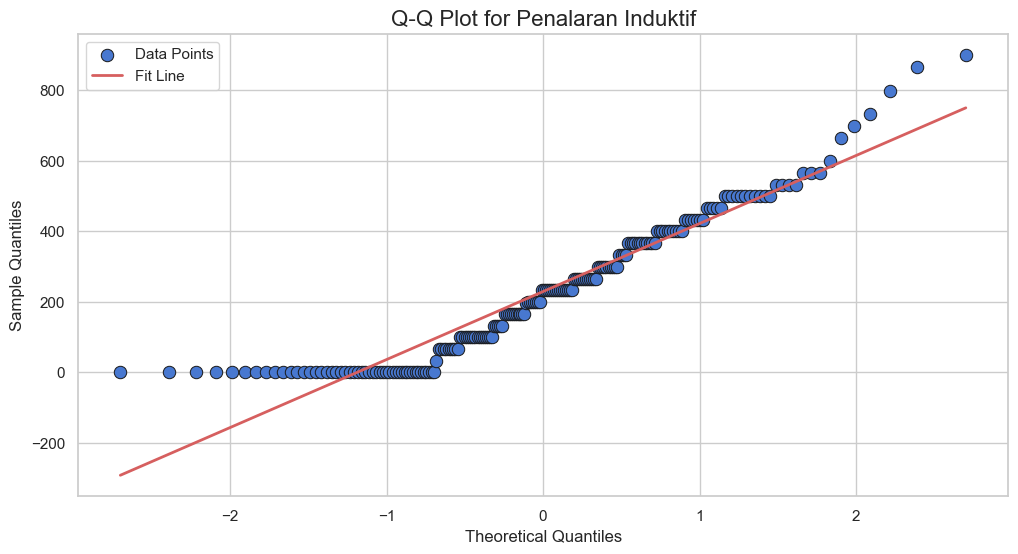

Shapiro-Wilk Normality Test: statistic=0.918, p_value=0.000000
Penalaran Induktif is not normally distributed




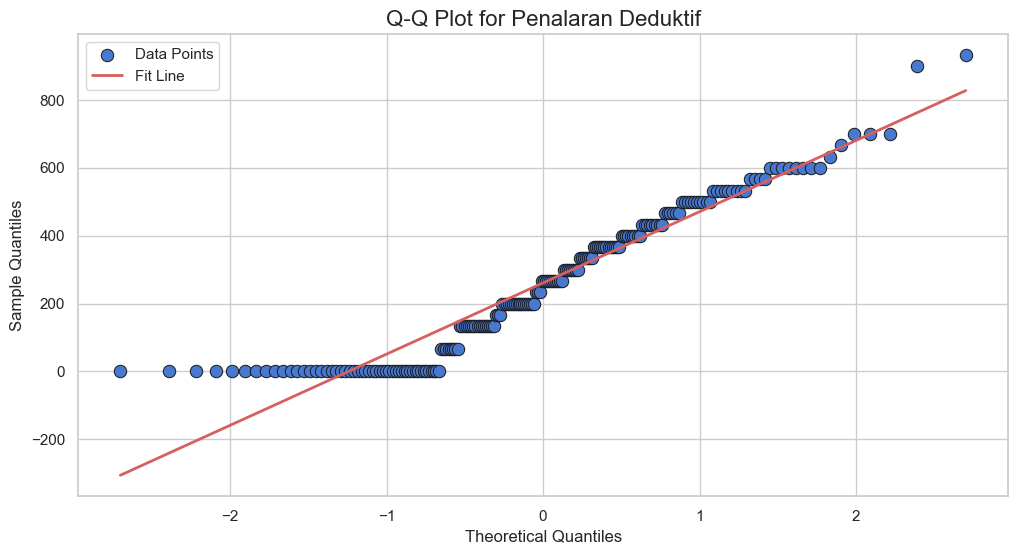

Shapiro-Wilk Normality Test: statistic=0.924, p_value=0.000000
Penalaran Deduktif is not normally distributed




In [3]:
# 1. Function to generate normality test

def normality_test(df, column_name, alpha=0.05):
    from scipy.stats import shapiro

    # Set the Seaborn theme for aesthetics
    sns.set(style="whitegrid", palette="muted", color_codes=True)

    # Shapiro-Wilk Normality Test
    stat, p_value_shapiro = shapiro(df[column_name])
    
    # Q-Q Plot
    plt.figure(figsize=(12, 6))
    (osm, osr), (slope, intercept, r) = stats.probplot(df[column_name], dist="norm")
    
    # Aesthetic plot using Seaborn
    sns.scatterplot(x=osm, y=osr, color="b", s=80, edgecolor='k', label='Data Points')  # Data points
    sns.lineplot(x=osm, y=intercept + slope * osm, color="r", lw=2, label='Fit Line')   # Fit line
    
    plt.title(f'Q-Q Plot for {column_name}', fontsize=16)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Sample Quantiles', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print Conclusion
    print(f"Shapiro-Wilk Normality Test: statistic={stat:.3f}, p_value={p_value_shapiro:.6f}")
    if p_value_shapiro > alpha:
        print(f"{column_name.title()} is normally distributed")
    else:
        print(f"{column_name.title()} is not normally distributed")


# 2. Run the normality test function
list_columns = [
        'Penalaran Kuantitatif', 'Literasi Bahasa Indonesia',
       'Literasi Bahasa Inggris', 'Penalaran Matematika',
       'Pemahaman Bacaan & Menulis', 'Pengetahuan & Pemahaman Umum',
       'Pengetahuan Kuantitatif', 'Penalaran Induktif', 'Penalaran Deduktif'
]

for column in list_columns:
    normality_test(df = df_tryout, column_name=column)
    print("\n")


# 4. Compare Means Test

In [4]:
"""
Since the normality test are not normally distributed,
we will use wilcoxon-ranked test test to compare means
"""

# 1. Create the function to do wilcoxon test
def wilcoxon_ranked_test(df, column_name, hypothesis_mean, alternative="two tail",alpha=0.05) :

    from scipy.stats import wilcoxon

    # Calculate differences from hypothesized mean
    df['Diff Test'] = df[column_name] - hypothesis_mean
    X = df['Diff Test'][df['Diff Test'] != 0].copy()

    # Perform Wilcoxon signed-rank test (default is two-tailed)
    rank, p_value = wilcoxon(X, zero_method='wilcox', correction=False)
    
    # Adjust p-value for one-tailed tests
    if alternative.lower() == 'less':
        # One-tailed test for "less"
        p_value /= 2 if np.median(df[column_name]) < hypothesis_mean else 1
    elif alternative.lower() == 'greater':
        # One-tailed test for "greater"
        p_value /= 2 if np.median(df[column_name]) > hypothesis_mean else 1
    
    # Print result
    print(f"Parameter : {column_name.title()}")
    print(f"Type of Test : Wilcoxon {alternative.title()} Test")
    print(f"Hypothesized Mean : {hypothesis_mean}")
    print(f"Sample Mean : {df[column_name].mean().round(2)}")
    print(f"Wilcoxon-Ranked Test : statistic={rank:.3f}, p_value={p_value:.6f}")
    
    # Conclusion based on alternative hypothesis
    if p_value > alpha:
        if alternative.lower() == 'two_tail':
            print(f"The difference is not significant (two-tailed).")
        elif alternative.lower() == 'less':
            print(f"The sample mean is not significantly less than the hypothesized mean.")
        elif alternative.lower() == 'greater':
            print(f"The sample mean is not significantly greater than the hypothesized mean.")
    else:
        if alternative.lower() == 'two_tail':
            print(f"There is a significant difference between sample mean and the hypothesized mean.")
        elif alternative.lower() == 'less':
            print(f"The sample mean is significantly less than the hypothesized mean.")
        elif alternative.lower() == 'greater':
            print(f"The sample mean is significantly greater than the hypothesized mean.")

# 2. Run the function for each column
list_columns = [
       'Penalaran Kuantitatif', 'Literasi Bahasa Indonesia',
       'Literasi Bahasa Inggris', 'Penalaran Matematika',
       'Pemahaman Bacaan & Menulis', 'Pengetahuan & Pemahaman Umum',
       'Pengetahuan Kuantitatif', 'Penalaran Induktif', 'Penalaran Deduktif'
]

hypothesize_mean = [
    282.69, 267.7,267.21,230.17,
    348.93,357.12,297.49,303.1,395.36
]

for i, column in enumerate(list_columns):
    wilcoxon_ranked_test(df = df_tryout, column_name=column, hypothesis_mean=hypothesize_mean[i],
                         alternative="less" )
    print("\n")

Parameter : Penalaran Kuantitatif
Type of Test : Wilcoxon Less Test
Hypothesized Mean : 282.69
Sample Mean : 189.0
Wilcoxon-Ranked Test : statistic=4821.000, p_value=0.000000
The sample mean is significantly less than the hypothesized mean.


Parameter : Literasi Bahasa Indonesia
Type of Test : Wilcoxon Less Test
Hypothesized Mean : 267.7
Sample Mean : 245.9
Wilcoxon-Ranked Test : statistic=7485.000, p_value=0.000873
The sample mean is significantly less than the hypothesized mean.


Parameter : Literasi Bahasa Inggris
Type of Test : Wilcoxon Less Test
Hypothesized Mean : 267.21
Sample Mean : 237.14
Wilcoxon-Ranked Test : statistic=6237.000, p_value=0.000002
The sample mean is significantly less than the hypothesized mean.


Parameter : Penalaran Matematika
Type of Test : Wilcoxon Less Test
Hypothesized Mean : 230.17
Sample Mean : 217.84
Wilcoxon-Ranked Test : statistic=8288.000, p_value=0.015755
The sample mean is significantly less than the hypothesized mean.


Parameter : Pemahaman 